__Hoja de trabajo Proyecto BMW - Toni__

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [703]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### 1.- Importamos los datos a un DataFrame

In [704]:
bmw=pd.read_csv('dataset/bmw_pricing_v3.csv')

In [705]:
bmw.shape

(4843, 18)

In [706]:
bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3916,BMW,X1,145242.0,120.0,NaN,diesel,brown,suv,True,True,False,False,False,NaN,True,False,12100.0,2018-02-01
193,BMW,318,11917.0,110.0,NaN,diesel,white,estate,False,False,False,False,False,False,False,NaN,23400.0,2018-05-01
633,NaN,318,153062.0,100.0,NaN,diesel,grey,estate,True,True,False,NaN,False,False,True,False,10800.0,2018-03-01
3950,NaN,X1,139839.0,85.0,2014-03-01,diesel,black,suv,False,False,False,NaN,True,True,True,False,11900.0,2018-02-01
1275,NaN,318,170185.0,100.0,NaN,diesel,white,estate,False,False,False,NaN,False,True,True,False,10500.0,2018-05-01


In [707]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [708]:
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


### __2.- Análisis de duplicados__

Vemos que no hay duplicados

In [709]:
bmw.duplicated().value_counts()

False    4843
Name: count, dtype: int64

In [710]:
bmw[bmw.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


### __3.- Análisis de nulos__

In [711]:
bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.1- MARCA

In [712]:
bmw.marca.unique()

array([nan, 'BMW'], dtype=object)

In [713]:
bmw.marca.value_counts(dropna=False, normalize=True)

marca
BMW    0.799711
NaN    0.200289
Name: proportion, dtype: float64

In [714]:
bmw2=bmw.copy()

In [715]:
del(bmw2['marca'])

In [716]:
bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


- 3.2- FECHA_REGISTRO

In [717]:
bmw2.fecha_registro.value_counts(dropna=False, normalize=True)*100

fecha_registro
NaN           50.030973
2013-07-01     1.920297
2014-03-01     1.713814
2014-05-01     1.672517
2013-01-01     1.610572
2013-10-01     1.589924
2014-02-01     1.527979
2013-06-01     1.383440
2014-01-01     1.383440
2013-02-01     1.383440
2013-11-01     1.259550
2012-10-01     1.259550
2013-04-01     1.218253
2014-04-01     1.197605
2013-09-01     1.197605
2013-03-01     1.197605
2013-08-01     1.115011
2012-06-01     1.115011
2014-07-01     1.115011
2014-09-01     1.011770
2013-05-01     0.949824
2014-08-01     0.929176
2012-11-01     0.887879
2012-03-01     0.867231
2014-06-01     0.846583
2013-12-01     0.825934
2012-01-01     0.722693
2014-10-01     0.722693
2014-11-01     0.702044
2012-04-01     0.702044
2012-07-01     0.681396
2012-09-01     0.660747
2012-08-01     0.598802
2015-03-01     0.578154
2012-05-01     0.557506
2012-12-01     0.536857
2012-02-01     0.392319
2015-06-01     0.392319
2015-10-01     0.392319
2015-01-01     0.371670
2015-05-01     0.371670
2

Demasiados nulos; la eliminamos.

In [718]:
bmw3=bmw2.copy()

In [719]:
del(bmw3['fecha_registro'])

In [720]:
bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.3- COLOR

In [721]:
bmw3.color.value_counts(dropna=False,normalize=True)*100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

9,18% de nulos de la muestra total. No los eliminamos. Imputamos le valor 'sin_info_color'

In [722]:
bmw4=bmw3.copy()

In [723]:
bmw4['color'].fillna('otros',inplace=True)

In [724]:
bmw4.color.value_counts(dropna=False,normalize=True)*100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
otros      9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

In [725]:
bmw4.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.4- TIPO_COCHE

In [726]:
bmw4.tipo_coche.value_counts(dropna=False,normalize=True)*100

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

30.14% de nulos. No los podemos eliminar al ser infomración valiosa

In [727]:
bmw4.tipo_coche.value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [728]:
bmw4.groupby(['modelo', 'tipo_coche'], dropna = False)['modelo'].count()

modelo             tipo_coche 
 Active Tourer     van              1
114                hatchback        6
                   subcompact       4
                   NaN              5
116                estate           2
                   hatchback      191
                   sedan            3
                   subcompact      56
                   NaN            106
118                convertible      1
                   coupe            2
                   hatchback       79
                   sedan            3
                   subcompact      13
                   NaN             45
120                convertible      4
                   hatchback       16
                   sedan            1
                   subcompact       2
                   NaN             13
123                hatchback        1
                   NaN              1
125                hatchback        5
135                convertible      1
                   coupe            1
                   

In [729]:
bmw5=bmw4.copy()

In [730]:
bmw5.tipo_coche.fillna('otros',inplace=True)

In [731]:
bmw5.tipo_coche.value_counts(normalize=True)*100

tipo_coche
otros          30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

In [732]:
bmw5.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.5.- AIRE_ACONDICIONADO

In [733]:
bmw5.aire_acondicionado.value_counts(dropna=False,normalize=True)*100

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

In [734]:
bmw6=bmw5.copy()

In [735]:
bmw6.aire_acondicionado.fillna('sin_info',inplace=True)

In [736]:
bmw6.aire_acondicionado.value_counts(dropna=False,normalize=True)*100

aire_acondicionado
True        71.546562
False       18.418336
sin_info    10.035102
Name: proportion, dtype: float64

In [737]:
bmw6.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado                0
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.6.- ASIENTOS_TRASEROS_PLEGABLES

In [738]:
bmw6.asientos_traseros_plegables.value_counts(dropna=False,normalize=True)*100

asientos_traseros_plegables
NaN      70.018584
False    23.745612
True      6.235804
Name: proportion, dtype: float64

In [739]:
bmw7=bmw6.copy()

In [740]:
del(bmw7['asientos_traseros_plegables'])

In [741]:
bmw7.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth               728
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.7.- BLUETOOTH

In [742]:
bmw7.bluetooth.value_counts(dropna=False,normalize=True)*100

bluetooth
False    64.402230
True     20.565765
NaN      15.032005
Name: proportion, dtype: float64

In [743]:
bmw8=bmw7.copy()

In [744]:
bmw8.bluetooth.fillna('sin_info',inplace=True)

In [745]:
bmw8.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth                 0
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.8.- ALERTA_LIM_VELOCIDAD

In [746]:
bmw8.alerta_lim_velocidad.value_counts(dropna=False,normalize=True)*100

alerta_lim_velocidad
True     46.252323
False    38.715672
NaN      15.032005
Name: proportion, dtype: float64

In [747]:
bmw9=bmw8.copy()

In [748]:
bmw9.alerta_lim_velocidad.fillna('sin_info',inplace=True)

In [749]:
bmw9.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

3.9.- Categorías con pocos nulos.


    3.9.1.- MODELO

In [750]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01
4766,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,diesel,white,otros,False,False,False,False,False,False,False,800.0,2018-03-01


Evaluamos los 3 nulos de forma individual

In [751]:
#Vehículo indice 173
bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)]['modelo'].value_counts(normalize=True)*100

modelo
318                 63.106796
X1                  11.650485
118                 10.679612
318 Gran Turismo     9.708738
X3                   3.883495
525                  0.970874
Name: proportion, dtype: float64

In [752]:
#Imputamos el modelo 318
bmw9.loc[[173],['modelo']]='318'

In [753]:
#Checkeo
bmw9.loc[[173]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,318,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01


In [754]:
#Vehículo indice 4766
bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==True)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)&(bmw9['tipo_coche']=='suv')&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X1    62.5
X3    37.5
Name: proportion, dtype: float64

In [755]:
#Imputamos el modelo X1
bmw9.loc[[4766],['modelo']]='X1'

In [756]:
#chekeo
bmw9.loc[[4766]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4766,X1,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01


In [757]:
#Vehículo indice 4802
bmw9[(bmw9['potencia']==110) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==False)&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X3     33.333333
218    33.333333
318    16.666667
X1     16.666667
Name: proportion, dtype: float64

In [758]:
#Vehículo indice 4802
bmw9[(bmw2['potencia']==110) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==False)&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X3     33.333333
218    33.333333
318    16.666667
X1     16.666667
Name: proportion, dtype: float64

In [759]:
#No podemos imputar un valor más probable.
#Lo eliminamos
bmw9=bmw9.drop(index=4802)

In [760]:
#bmw9.loc[[4802]]

In [761]:
bmw9.isnull().sum()

modelo                  0
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.2.- KM

In [762]:
bmw9[bmw9['km'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,diesel,black,otros,True,True,True,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,diesel,blue,van,True,True,True,True,False,True,True,19500.0,2018-07-01


No podemos imputar de ninguna manera los KM de cada vehículo. Los eliminamos.

In [763]:
bmw9.dropna(subset='km', inplace=True)

In [764]:
bmw9[bmw9['km'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [765]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.3.- POTENCIA

In [766]:
bmw9[bmw9['potencia'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,diesel,black,estate,False,True,False,False,False,True,True,18700.0,2018-03-01


In [767]:
#Podemos averigual la potencia segun modelo y otras variables?
bmw9[['modelo','potencia','tipo_gasolina','tipo_coche','volante_regulable','aire_acondicionado','elevalunas_electrico']][(bmw9['modelo']=='525')&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==True)&(bmw9['elevalunas_electrico']==False)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,elevalunas_electrico,count
0,525,160.0,diesel,estate,False,True,False,4


In [768]:
#Imputamos el valor 160
bmw9.loc[[181],['potencia']]=160.0

In [769]:
bmw9[bmw9['potencia'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [770]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.4.- TIPO_GASOLINA

In [771]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaN,black,otros,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [772]:
#Evaluamos el modelo 420 (indice 82) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina','volante_regulable','aire_acondicionado']][(bmw9['modelo']=='420')&(bmw9['potencia']==135)&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==False)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,volante_regulable,aire_acondicionado,count
0,420,135.0,diesel,False,False,7


In [773]:
#Imputamos el valor 'diesel'
bmw9.loc[[82],['tipo_gasolina']]='diesel'
#check
bmw9.loc[[82],['tipo_gasolina']]

,tipo_gasolina
82,diesel


In [774]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [775]:
#Evaluamos el modelo 320 (indice 185) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado']][(bmw9['modelo']=='320')&(bmw9['potencia']==135)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==False)].value_counts().reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,count
0,diesel,320,135.0,estate,False,False,22


In [776]:
#Imputamos el valor 'diesel'
bmw9.loc[[185],['tipo_gasolina']]='diesel'
bmw9.loc[[185],['tipo_gasolina']]

,tipo_gasolina
185,diesel


In [777]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [778]:
#Evaluamos el modelo 318 (indice 444) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad']][(bmw9['modelo']=='318')&(bmw9['potencia']==100)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==True)&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==True)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,proportion
0,diesel,318,100.0,estate,True,True,False,False,False,True,0.857143
1,petrol,318,100.0,estate,True,True,False,False,False,True,0.142857


In [779]:
#Imputamos el valor 'diesel'
bmw9.loc[[444],['tipo_gasolina']]='diesel'
bmw9.loc[[444],['tipo_gasolina']]

,tipo_gasolina
444,diesel


In [780]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
480,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [781]:
#Evaluamos el modelo 318 (indice 480) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad']][(bmw9['modelo']=='318')&(bmw9['potencia']==105)&(bmw9['volante_regulable']==False)&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==False)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,proportion
0,diesel,318,105.0,estate,False,True,False,False,False,False,0.6
1,diesel,318,105.0,otros,False,True,False,False,False,False,0.2
2,diesel,318,105.0,sedan,False,True,False,False,False,False,0.2


In [782]:
#Imputamos el valor 'diesel'
bmw9.loc[[480],['tipo_gasolina']]='diesel'
bmw9.loc[[480],['tipo_gasolina']]

,tipo_gasolina
480,diesel


In [783]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
630,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [784]:
#Evaluamos el modelo 318 (indice 630) para ver si podemos imputar el tipo_gasolina
bmw9[['tipo_gasolina','modelo','potencia','tipo_coche','volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']][(bmw9['modelo']=='318')&(bmw9['potencia']==105)&(bmw9['tipo_coche']=='estate')&(bmw9['volante_regulable']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['alerta_lim_velocidad']==True)&(bmw9['gps']==False)].value_counts(normalize=True).reset_index()

,tipo_gasolina,modelo,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,proportion
0,diesel,318,105.0,estate,False,False,False,False,False,True,False,0.50
1,diesel,318,105.0,estate,False,True,False,False,False,True,False,0.25
2,diesel,318,105.0,estate,False,sin_info,False,False,False,True,False,0.25


In [785]:
#Imputamos el valor 'diesel'
bmw9.loc[[630],['tipo_gasolina']]='diesel'
bmw9.loc[[630],['tipo_gasolina']]

,tipo_gasolina
630,diesel


In [786]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [787]:
bmw9.isna().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.5.- VOLANTE_REGULABLE

In [788]:
bmw9[bmw9['volante_regulable'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,False,True,sin_info,11900.0,2018-06-01
273,318,195032.0,100.0,diesel,grey,otros,NaN,sin_info,False,False,False,True,False,4900.0,2018-01-01
489,320,227691.0,135.0,diesel,black,otros,NaN,True,False,False,True,True,False,10500.0,2018-02-01
614,318,201626.0,105.0,diesel,black,otros,NaN,sin_info,False,True,False,True,True,11700.0,2018-03-01


In [789]:
#Evaluamos el modelo 320 (indice 66) para ver si podemos imputar el volante_regulable
bmw9[['volante_regulable','tipo_gasolina','modelo','potencia','tipo_coche','camara_trasera','elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']][(bmw9['modelo']=='320')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['bluetooth']==False)&(bmw9['gps']==True)].value_counts(normalize=True).reset_index()

,volante_regulable,tipo_gasolina,modelo,potencia,tipo_coche,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,proportion


In [790]:
#Los eliminamos
bmw9.dropna(subset='volante_regulable',inplace=True)

In [791]:
bmw9[bmw9['volante_regulable'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [792]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.6.- CAMARA_TRASERA

In [793]:
bmw9[bmw9['camara_trasera'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,diesel,otros,estate,True,True,NaN,True,sin_info,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [794]:
#Evaluamos el modelo 520 (indice 291) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='520')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

camara_trasera  modelo  potencia  tipo_gasolina  tipo_coche
False           520     135.0     diesel         estate        0.709677
True            520     135.0     diesel         estate        0.290323
Name: proportion, dtype: float64

In [795]:
#Imputamos el valro False
bmw9.loc[[291],['camara_trasera']]=False
bmw9.loc[291]['camara_trasera']

False

In [796]:
bmw9[bmw9['camara_trasera'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [797]:
#Evaluamos el modelo 316 (indice 409) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='316')&(bmw9['potencia']==85)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

camara_trasera  modelo  potencia  tipo_gasolina  tipo_coche
False           316     85.0      diesel         estate        0.948718
True            316     85.0      diesel         estate        0.051282
Name: proportion, dtype: float64

In [798]:
#Imputamos el valro False
bmw9.loc[[409],['camara_trasera']]=False
bmw9.loc[409]['camara_trasera']

False

In [799]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.7.- ELEVALUNAS_ELECTRICO

In [800]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,diesel,otros,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [801]:
#Evaluamos el modelo 640 (indice 63) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='640')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')].value_counts(normalize=True)

elevalunas_electrico  modelo  potencia  tipo_gasolina  tipo_coche
True                  640     230.0     diesel         coupe         1.0
Name: proportion, dtype: float64

In [802]:
#imputamos el valor True
bmw9.loc[[63],['elevalunas_electrico']]=True
bmw9.loc[63]['elevalunas_electrico']

True

In [803]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [804]:
#Evaluamos el modelo 535 (indice 305) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='535')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True)

elevalunas_electrico  modelo  potencia  tipo_gasolina  tipo_coche
True                  535     230.0     diesel         estate        0.9
False                 535     230.0     diesel         estate        0.1
Name: proportion, dtype: float64

In [805]:
#imputamos el valor True
bmw9.loc[[305],['elevalunas_electrico']]=True
bmw9.loc[305]['elevalunas_electrico']

True

In [806]:
bmw9[bmw9['elevalunas_electrico'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [807]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

    3.9.8.- PRECIO

Precio es la variable TARGET a predecir. Eliminamos los nulos d precio directamente.

In [808]:
bmw9.dropna(subset='precio',inplace=True)

In [809]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             1
dtype: int64

    3.9.9.- FECHA_VENTA

No hay forma de saber la fecha de venta de un coche. Eliminamos el nulo directamente.

In [810]:
bmw9.dropna(subset='fecha_venta',inplace=True)

In [811]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

Reseteamos el indice del DataFrame ya que hemos eliminado varios elementos. De esta forma no quedarán huecos vacíos de indices.

In [812]:
bmw10=bmw9.copy()

In [813]:
bmw10.reset_index(drop=True,inplace=True)

In [814]:
bmw10.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

### 4.- Analisis Univariable

In [815]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   object 
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   object 
 9   elevalunas_electrico  4829 non-null   object 
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(1), float64(3

- 4.1.- Evaluamos si hay variables que se puedan convertir a boleanas

In [816]:
bmw10['volante_regulable'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([True, False], dtype=object)

In [817]:
#Convertimos a boleana
bmw10['volante_regulable']=bmw10['volante_regulable'].astype(bool)

In [818]:
bmw10['aire_acondicionado'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array([True, False, 'sin_info'], dtype=object)

In [819]:
bmw10['camara_trasera'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([False, True], dtype=object)

In [820]:
#Convertimos a boleana
bmw10['camara_trasera']=bmw10['camara_trasera'].astype(bool)

In [821]:
bmw10['elevalunas_electrico'].unique()
#Sólo tiene 2 valores (True/False). Puede convertirse a boleana.

array([True, False], dtype=object)

In [822]:
#Convertimos a boleana
bmw10['elevalunas_electrico']=bmw10['elevalunas_electrico'].astype(bool)

In [823]:
bmw10['bluetooth'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array(['sin_info', True, False], dtype=object)

In [824]:
bmw10['alerta_lim_velocidad'].unique()
#Tiene 3 valores, NO puede convertirse a boleana

array(['sin_info', True, False], dtype=object)

In [825]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   bool   
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   bool   
 9   elevalunas_electrico  4829 non-null   bool   
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(4), float64(3

- 4.2.- Listamos las variables según si son numéricas, boleanas o categóricas y las evaluamos

In [826]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [827]:
num,bol,cat=obtener_lista_variables(bmw10)

In [828]:
num

['km', 'potencia']

In [829]:
bol

['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

In [830]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

    - 4.2.1- Variables numéricas

In [831]:
bmw10[num].describe()
#Observamos que 'km' tiene valores negtivos y puede tener outliers
#'potencia' tiene un 0 como valor mínimo, lo que parece extraño y podría considerarse como outlier; el valor máximo también podría serlo.

,km,potencia
count,4.829000e+03,4829.000000
mean,1.409126e+05,129.001864
std,6.020077e+04,39.026898
min,-6.400000e+01,0.000000
25%,1.028560e+05,100.000000
50%,1.410630e+05,120.000000
75%,1.751740e+05,135.000000
max,1.000376e+06,423.000000


    - 4.2.1.1- KM

In [832]:
bmw10['km']=bmw10['km'].astype('int32')

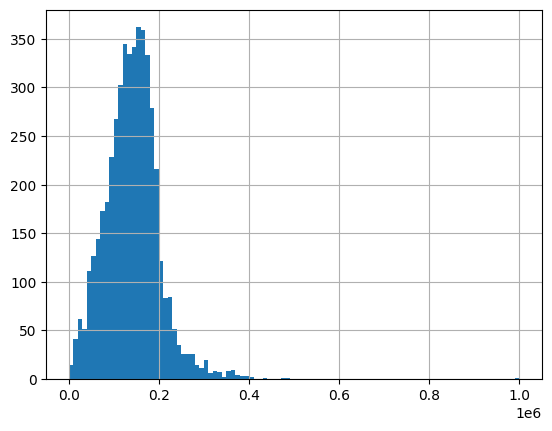

In [833]:
bmw10.km.hist(bins=100);

In [834]:
bmw10.km.describe()

count    4.829000e+03
mean     1.409126e+05
std      6.020077e+04
min     -6.400000e+01
25%      1.028560e+05
50%      1.410630e+05
75%      1.751740e+05
max      1.000376e+06
Name: km, dtype: float64

In [835]:
bmw10[(bmw10['km']<0) | (bmw10['km']>1e+06)]


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2926,640 Gran Coupé,-64,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01
3720,118,1000376,90.0,diesel,otros,otros,True,False,False,False,sin_info,True,False,1400.0,2018-06-01


In [836]:
bmw11=bmw10.copy()

In [837]:
#Eliminamos el valor negativo que no tiene sentido y el outlier
del_ind=bmw11[(bmw11['km']<0) | (bmw11['km']>1e+06)].index.tolist()
del_ind


[2926, 3720]

In [838]:
bmw11.drop(index=del_ind,inplace=True)

In [839]:
bmw11[(bmw11['km']<0) | (bmw11['km']>1e+06)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


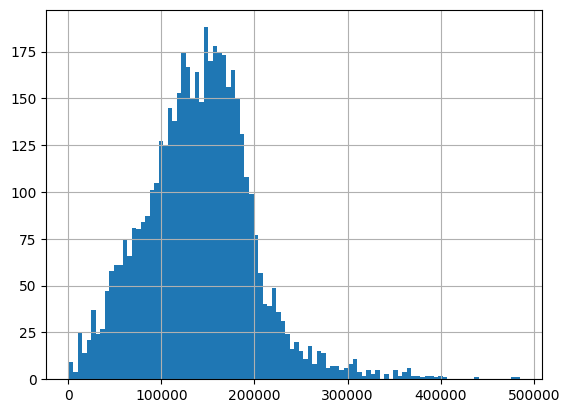

In [840]:
bmw11.km.hist(bins=100);

In [841]:
bmw11[['km']][(bmw11['km']>4e+05)]

,km
549,484615
1561,400654
2338,477571
2817,439060
3186,405816


In [842]:
#Eliminamos outliers por encima de 400k KM
bmw11.drop(index=bmw11[['km']][(bmw11['km']>4e+05)].index.tolist(),inplace=True)

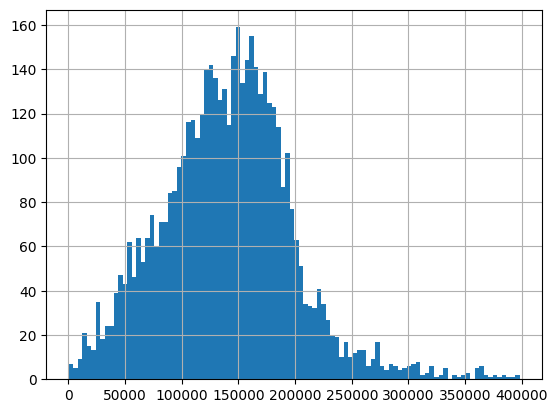

In [843]:
bmw11.km.hist(bins=100);

    - 4.2.1.1- POTENCIA

In [844]:
bmw11.potencia.describe()

count    4822.000000
mean      129.014932
std        39.013991
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [845]:
bmw11['potencia']=bmw11['potencia'].astype('int16')

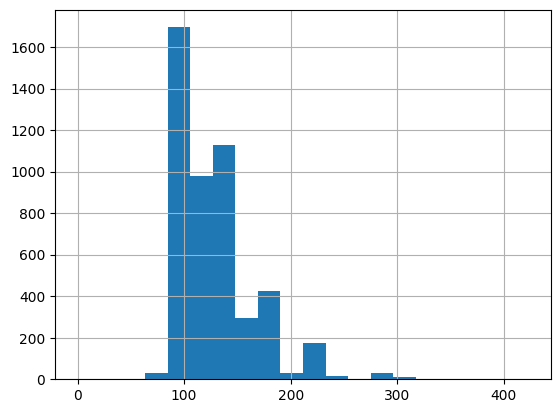

In [846]:
bmw11.potencia.hist(bins=20);

In [847]:
bmw12=bmw11.copy()

In [848]:
bmw12[bmw12['potencia']==0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3753,X1,81770,0,diesel,white,suv,False,False,False,False,False,False,sin_info,11700.0,2018-03-01


In [849]:
bmw12[bmw12['potencia']==0].index.tolist()

[3753]

In [850]:
bmw12.drop(index=bmw12[bmw12['potencia']==0].index.tolist(),inplace=True)

In [851]:
bmw12.describe()

,km,potencia,precio
count,4821.000000,4821.000000,4821.000000
mean,140464.065961,129.041693,15846.338934
std,58110.445316,38.973751,9178.752841
min,476.000000,25.000000,100.000000
25%,102856.000000,100.000000,10900.000000
50%,140904.000000,120.000000,14200.000000
75%,175118.000000,135.000000,18600.000000
max,398043.000000,423.000000,178500.000000


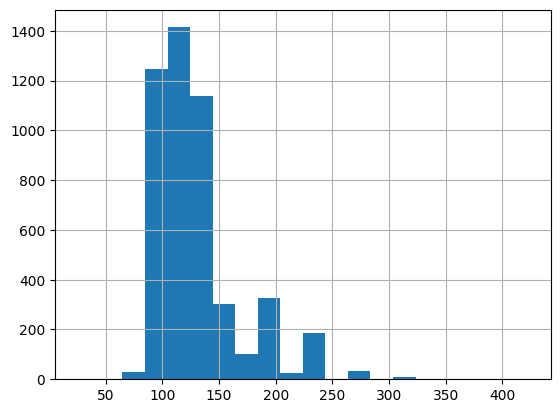

In [852]:
bmw12.potencia.hist(bins=20);

In [853]:
bmw12[bmw12['potencia']>400]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3589,M5,150187,412,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01
4134,X6 M,2970,423,petrol,red,suv,True,sin_info,True,False,False,True,True,82400.0,2018-04-01


In [854]:
bmw12[bmw12['potencia']>400].index.tolist()

[3589, 4134]

In [855]:
bmw12.drop(index=bmw12[bmw12['potencia']>400].index.tolist(),inplace=True)

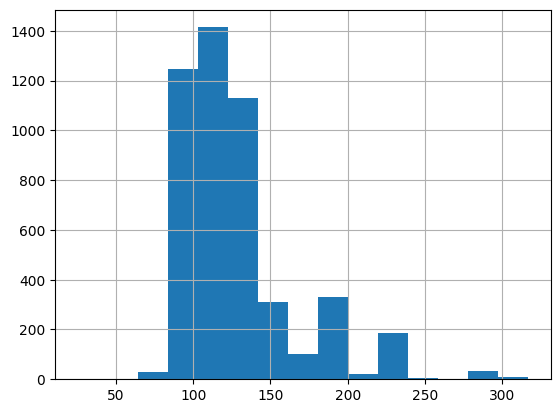

In [856]:
bmw12.potencia.hist(bins=15);

    - 4.2.2- Variables boleanas

Al ser boleanas, no hay que hacerles ningún otro tratamiento ni evaluación

    - 4.2.3- Variables categóricas

In [857]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

    - 4.2.3.1- MODELO

In [933]:
(bmw12[['modelo']].value_counts(normalize=True)*100).reset_index().head(15)

,modelo,count
0,320,746
1,520,630
2,318,565
3,X3,437
4,116,358
5,X1,274
6,316,234
7,X5,231
8,525,182
9,530,157


In [859]:
(bmw12[['modelo']].value_counts(normalize=True)*100).reset_index().count()

modelo        75
proportion    75
dtype: int64

In [860]:
bmw13=bmw12.copy()
bmw13.reset_index(drop=True,inplace=True)

In [861]:
#Unificamos los modelos. Ej: 318 Gran Turismo para a ser solo 318
#Almacenamos los modelos simplificados en una lista.
mod_unificados=[]
for i in bmw13['modelo']:
    x=i.split()
    mod_unificados.append(x[0])
len(mod_unificados)

4819

In [862]:
#Siguiendo el indice del df, sustituimos los valores simplificados de cada modelo en el DF
for i in bmw13['modelo'].index:
    bmw13.loc[[i],['modelo']]=mod_unificados[i]

In [863]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().head(20)

,modelo,proportion
0,320,16.995227
1,318,13.737290
2,520,13.550529
3,X3,9.068271
4,116,7.428927
5,X1,5.685827
6,X5,5.208549
7,316,4.855779
8,525,3.776717
9,530,3.631459


In [864]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().count()
#Hemos reducido de 75 a 54 modelos

modelo        54
proportion    54
dtype: int64

In [865]:
bmw13.modelo.value_counts(normalize=True)*100
#Eliminaremos los outliers, considerando estos una representación en la muestra por debajo del 0.2% (10 resgistros o menos)

modelo
320             16.995227
318             13.737290
520             13.550529
X3               9.068271
116              7.428927
X1               5.685827
X5               5.208549
316              4.855779
525              3.776717
530              3.631459
118              2.946669
420              1.577091
518              1.369579
X6               1.058311
535              0.996057
X4               0.954555
120              0.747043
330              0.747043
218              0.705541
730              0.684789
640              0.539531
325              0.477277
740              0.373521
114              0.311268
M550             0.249014
335              0.207512
435              0.207512
216              0.166010
418              0.166010
M3               0.145258
Z4               0.124507
i3               0.124507
430              0.124507
528              0.124507
125              0.103756
328              0.103756
135              0.083005
523              0.083005
220  

In [866]:
#Creamos dataframe de soporte con la cantidad de modelos que hay y su numero
df_sup=bmw13.modelo.value_counts().reset_index()
df_sup.head(2)

,modelo,count
0,320,819
1,318,662


In [867]:
#creamos una lista de modelos con mesnos de 10 registros (considerados outliers)
outliers_models=df_sup[df_sup['count']<10].values[:,0].tolist()
len(outliers_models)

27

In [868]:
bmw13[bmw13['modelo'].isin(outliers_models)].shape

(92, 15)

In [869]:
#eliminamos los registros con los modelos obtenidos
bmw13['modelo'][bmw13['modelo'].isin(outliers_models)]='otros'

C:\Users\toniv\AppData\Local\Temp\ipykernel_9400\1905426004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw13['modelo'][bmw13['modelo'].isin(outliers_models)]='otros'


In [870]:
bmw13.modelo.value_counts(normalize=True)*100

modelo
320      16.995227
318      13.737290
520      13.550529
X3        9.068271
116       7.428927
X1        5.685827
X5        5.208549
316       4.855779
525       3.776717
530       3.631459
118       2.946669
otros     1.909110
420       1.577091
518       1.369579
X6        1.058311
535       0.996057
X4        0.954555
330       0.747043
120       0.747043
218       0.705541
730       0.684789
640       0.539531
325       0.477277
740       0.373521
114       0.311268
M550      0.249014
335       0.207512
435       0.207512
Name: proportion, dtype: float64

In [871]:
(bmw13[['modelo']].value_counts(normalize=True)*100).reset_index().count()
#Hemos pasadod e 54 a 27 modelos relevantes.

modelo        28
proportion    28
dtype: int64

    - 4.2.3.2- TIPO_GASOLINA

In [872]:
bmw14=bmw13.copy()

In [873]:
bmw14.tipo_gasolina.describe()

count       4819
unique         5
top       diesel
freq        4614
Name: tipo_gasolina, dtype: object

In [874]:
bmw14.tipo_gasolina.value_counts()
#Existe la categoria Diesel (con D mayuscula). Las agrupamos. Eliminamos la categoría 'hybrid_petrol' al sólo haber 3 registros.

tipo_gasolina
diesel           4614
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [875]:
bmw14['tipo_gasolina'] = bmw14['tipo_gasolina'].str.lower()
bmw14.drop(bmw14[(bmw14['tipo_gasolina'].isin(['hybrid_petrol','electro']))].index, inplace=True)
bmw14['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4619
petrol     189
Name: count, dtype: int64

    - 4.2.3.3- COLOR

In [876]:
bmw14.color.describe()

count      4808
unique       11
top       black
freq       1488
Name: color, dtype: object

In [877]:
bmw14.color.value_counts()

color
black     1488
grey      1063
blue       640
white      480
otros      443
brown      301
silver     290
red         46
beige       37
green       14
orange       6
Name: count, dtype: int64

    - 4.2.3.4- TIPO_COCHE

In [878]:
bmw14.tipo_coche.describe()

count      4808
unique        9
top       otros
freq       1445
Name: tipo_coche, dtype: object

In [879]:
bmw14.tipo_coche.value_counts()

tipo_coche
otros          1445
estate         1102
sedan           817
suv             751
hatchback       485
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

    - 4.2.3.5- AIRE_ACONDICIONADO

In [880]:
bmw14.aire_acondicionado.describe()

count     4808
unique       3
top       True
freq      3445
Name: aire_acondicionado, dtype: object

In [881]:
bmw14.aire_acondicionado.value_counts(normalize=True)*100

aire_acondicionado
True        71.651414
False       18.344426
sin_info    10.004160
Name: proportion, dtype: float64

    - 4.2.3.6- BLUETOOTH

In [882]:
bmw14.bluetooth.describe()

count      4808
unique        3
top       False
freq       3097
Name: bluetooth, dtype: object

In [883]:
bmw14.bluetooth.value_counts(normalize=True)*100

bluetooth
False       64.413478
True        20.569884
sin_info    15.016639
Name: proportion, dtype: float64

    - 4.2.3.7- ALERTA_LIM_VELOCIDAD

In [884]:
bmw14.alerta_lim_velocidad.describe()

count     4808
unique       3
top       True
freq      2222
Name: alerta_lim_velocidad, dtype: object

In [885]:
bmw14.alerta_lim_velocidad.value_counts(normalize=True)*100

alerta_lim_velocidad
True        46.214642
False       38.727121
sin_info    15.058236
Name: proportion, dtype: float64

    - 4.2.3.8- FECHA_VENTA

In [886]:
bmw14.fecha_venta.describe()

count           4808
unique            13
top       2018-05-01
freq             807
Name: fecha_venta, dtype: object

In [887]:
bmw14.fecha_venta.value_counts()

fecha_venta
2018-05-01    807
2018-03-01    727
2018-04-01    685
2018-06-01    600
2018-07-01    533
2018-08-01    526
2018-02-01    497
2018-09-01    222
2018-01-01    207
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: count, dtype: int64

In [888]:
bmw14['fecha_venta'].value_counts().reset_index().sort_values(by='fecha_venta')

,fecha_venta,count
9,2007-08-01,1
12,2008-06-01,1
11,2009-04-01,1
10,2010-04-01,1
8,2018-01-01,207
6,2018-02-01,497
1,2018-03-01,727
2,2018-04-01,685
0,2018-05-01,807
3,2018-06-01,600


In [889]:
bmw15=bmw14.copy()

In [890]:
#Eliminamos la columna 'fecha_venta'. Las fechas no tienen continuidad entre sí y no nos aportan información.
del(bmw15['fecha_venta'])

In [891]:
bmw15.sample(5)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
1874,118,112381,105,diesel,otros,hatchback,False,False,False,False,False,False,False,8700.0
2367,318,174999,100,diesel,black,otros,False,True,False,False,True,True,sin_info,16400.0
2233,118,53952,110,diesel,blue,hatchback,False,True,False,False,False,True,False,12300.0
686,316,257000,85,diesel,black,otros,False,True,False,False,False,True,False,8200.0
1568,320,122697,135,diesel,black,estate,True,sin_info,True,True,sin_info,True,False,9900.0


    - 4.2.3.9- PRECIO

In [892]:
bmw15.precio.describe()

count      4808.000000
mean      15787.791181
std        9031.710234
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

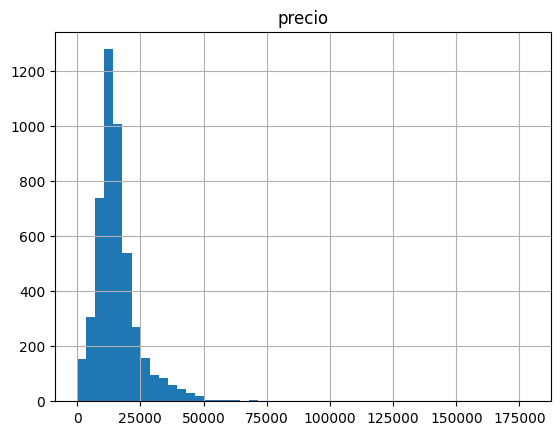

In [893]:
bmw15.hist('precio',bins=50);

<Axes: xlabel='precio'>

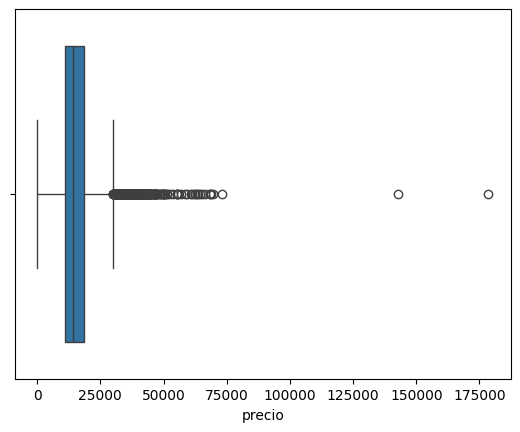

In [894]:
sns.boxplot(x=bmw15.precio)

In [895]:
bmw15[['precio']][(bmw15['precio']>=70000)]

,precio
4662,142800.0
4709,73100.0
4731,178500.0


In [896]:
#Eliminamos los outliers del precio. Por encima de 70k
bmw15.drop(index=bmw15[['precio']][(bmw15['precio']>=70000)].index.tolist(),inplace=True)

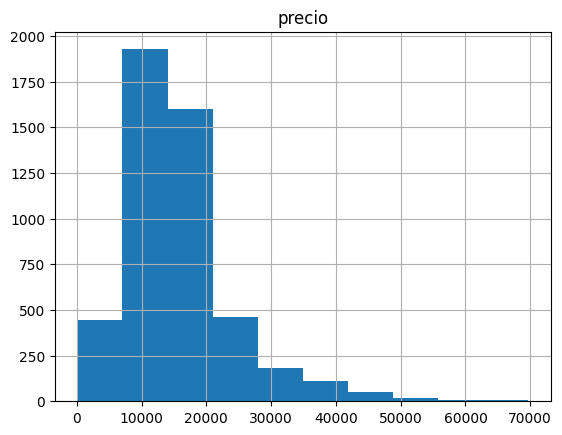

In [928]:
bmw15.hist('precio');

<Axes: xlabel='precio'>

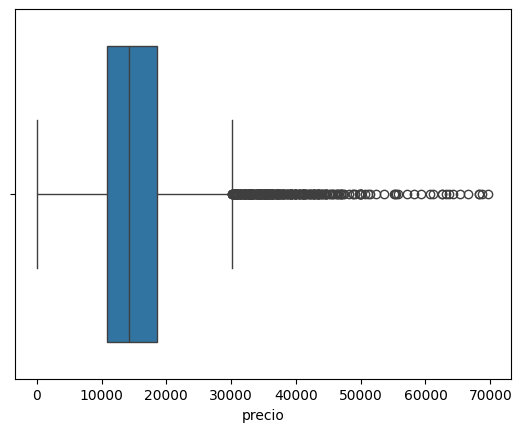

In [898]:
sns.boxplot(x=bmw15.precio)

In [899]:
bmw15.precio.describe()

count     4805.000000
mean     15715.567118
std       8489.088794
min        100.000000
25%      10900.000000
50%      14200.000000
75%      18600.000000
max      69700.000000
Name: precio, dtype: float64

In [900]:
bmw15[['precio']][(bmw15['precio']<1000)].count()

precio    58
dtype: int64

In [901]:
bmw15.reset_index(drop=True,inplace=True)

### 5.- Analisis de correlación

In [902]:
bmw_clean=bmw15.copy()

In [903]:
corr=bmw_clean.corr(numeric_only=True)

In [904]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,camara_trasera,elevalunas_electrico,gps,precio
km,1.000000,-0.041046,0.071585,0.002043,0.053997,0.160342,-0.426393
potencia,-0.041046,1.000000,0.326858,0.315509,0.346380,0.007458,0.677428
volante_regulable,0.071585,0.326858,1.000000,0.255593,0.278402,0.244658,0.285325
camara_trasera,0.002043,0.315509,0.255593,1.000000,0.200433,0.061965,0.268057
elevalunas_electrico,0.053997,0.346380,0.278402,0.200433,1.000000,0.201995,0.289483
gps,0.160342,0.007458,0.244658,0.061965,0.201995,1.000000,0.016570
precio,-0.426393,0.677428,0.285325,0.268057,0.289483,0.016570,1.000000


Vemos que lo que más influye en el precio final de venta es la potencia y el kilometraje de forma inversa. La vriable GPS no tiene ningún tipo de relevancia en cuanto al precio final. La eliminamos.

In [905]:
del(bmw_clean['gps'])

In [906]:
corr=bmw_clean.corr(numeric_only=True)

In [907]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,camara_trasera,elevalunas_electrico,precio
km,1.000000,-0.041046,0.071585,0.002043,0.053997,-0.426393
potencia,-0.041046,1.000000,0.326858,0.315509,0.346380,0.677428
volante_regulable,0.071585,0.326858,1.000000,0.255593,0.278402,0.285325
camara_trasera,0.002043,0.315509,0.255593,1.000000,0.200433,0.268057
elevalunas_electrico,0.053997,0.346380,0.278402,0.200433,1.000000,0.289483
precio,-0.426393,0.677428,0.285325,0.268057,0.289483,1.000000


### 6.- Analisis de variables vs target

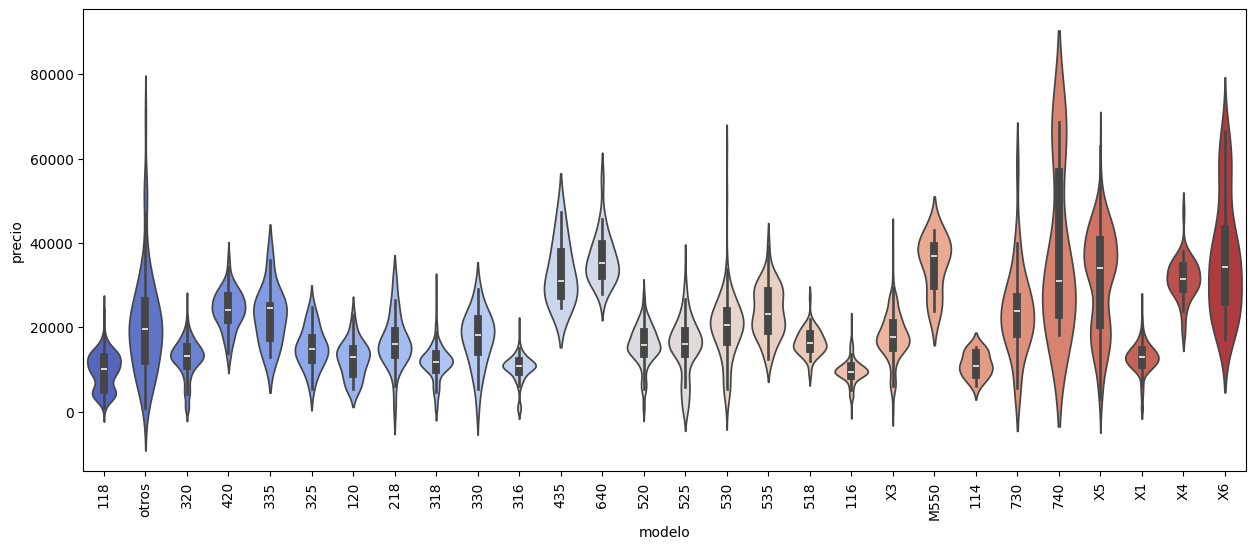

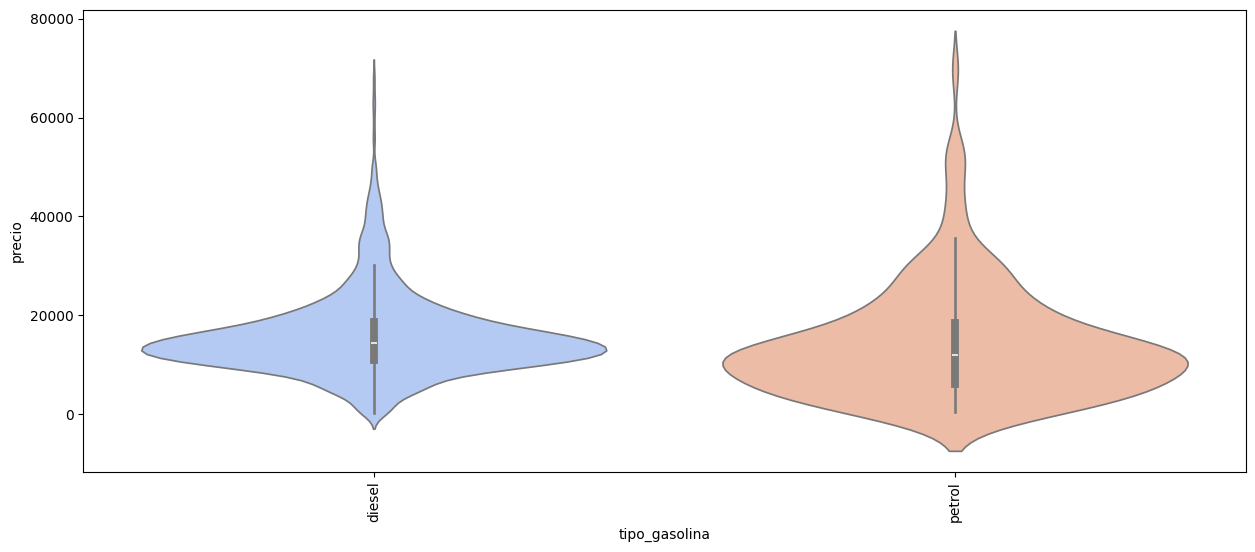

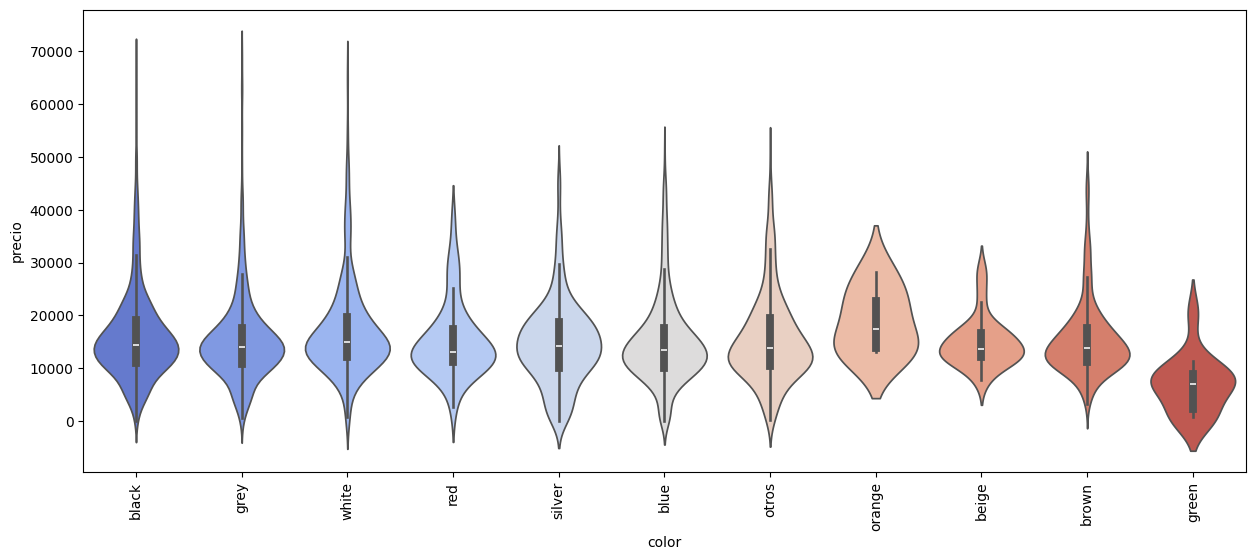

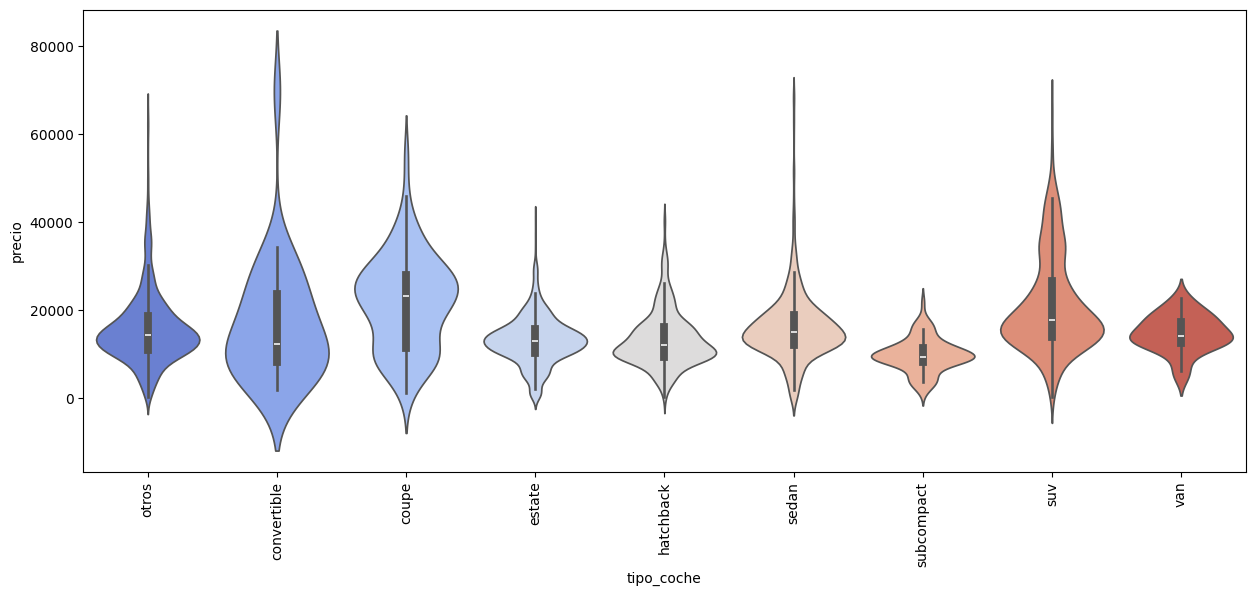

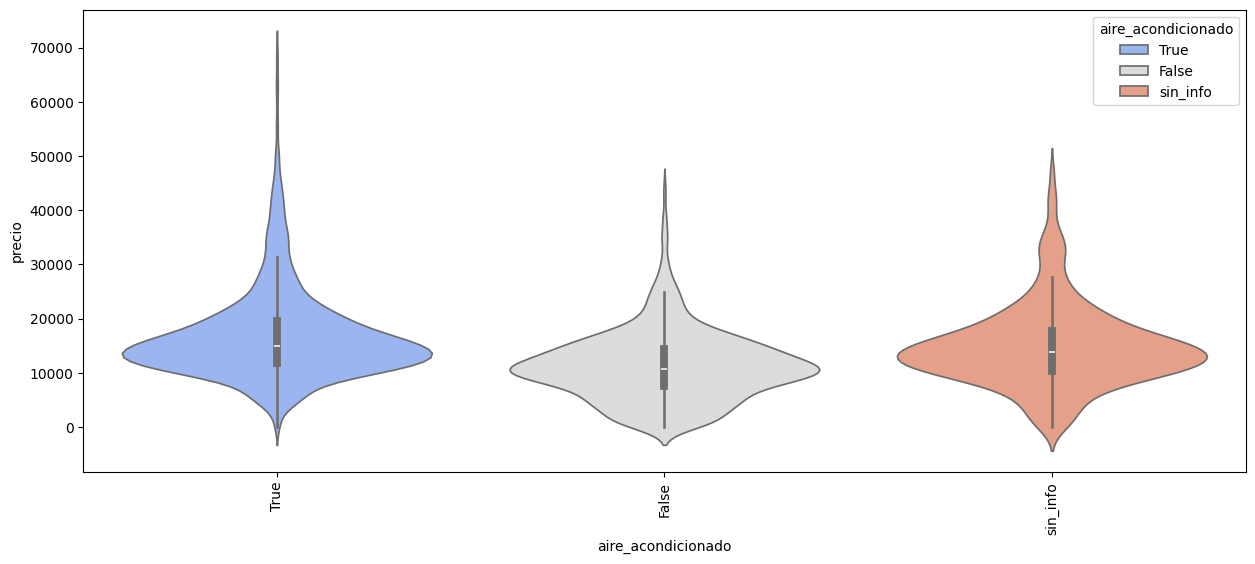

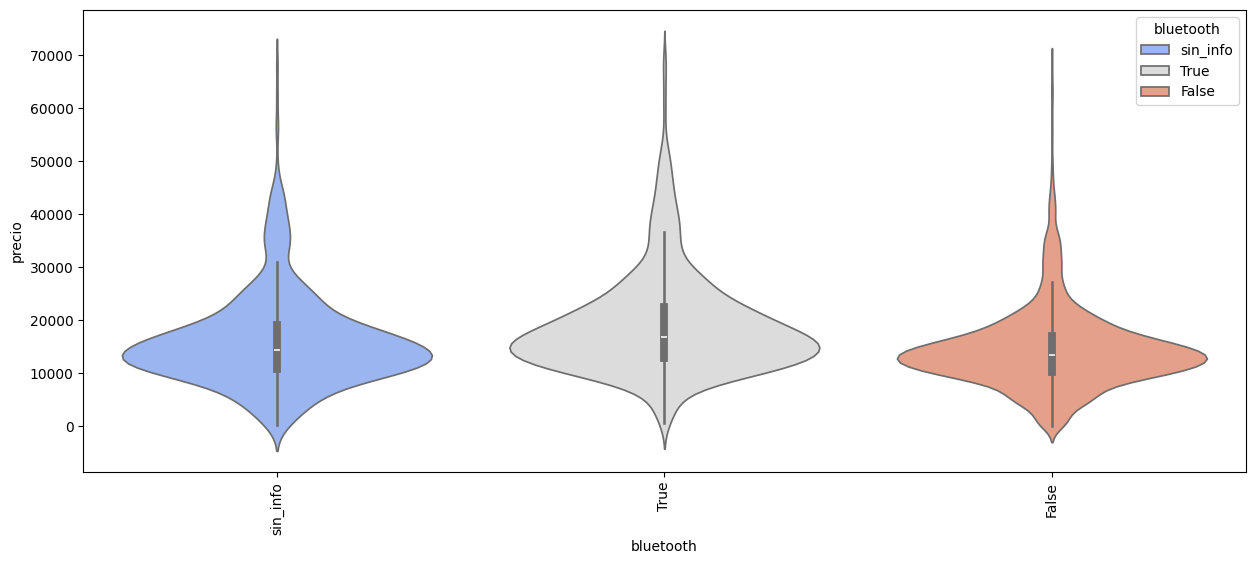

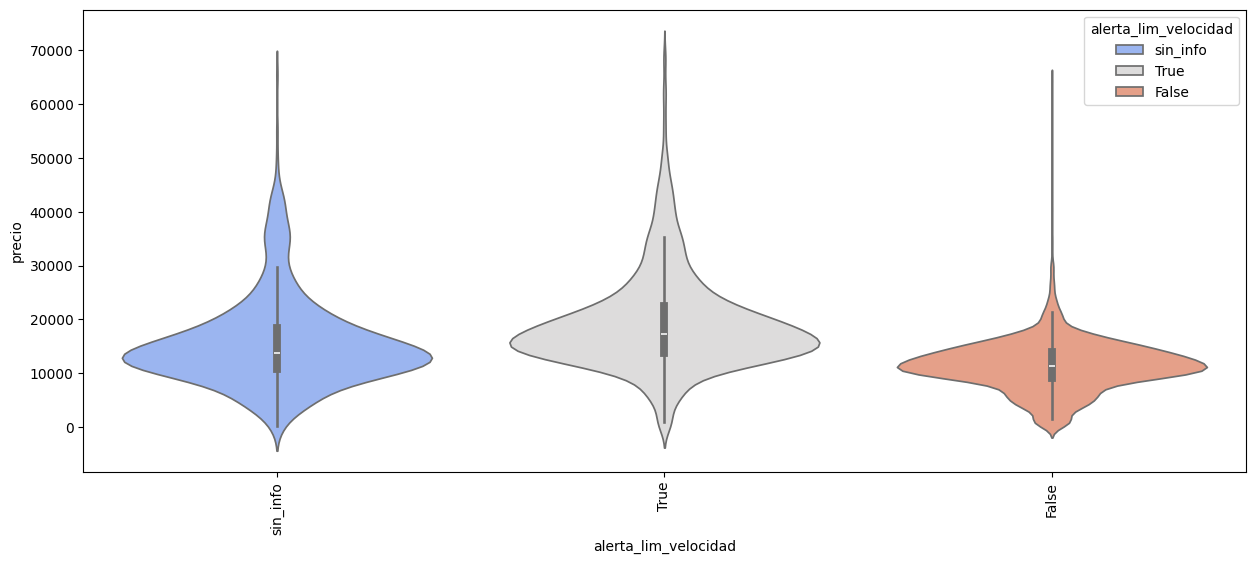

In [908]:
for i in bmw_clean:
  if (bmw_clean[i].dtype.kind =="O"):
    plt.figure(figsize=(15,6))
    sns.violinplot(x=i,y="precio", data=bmw_clean, hue = i, palette = 'coolwarm');
    plt.xticks(rotation=90)

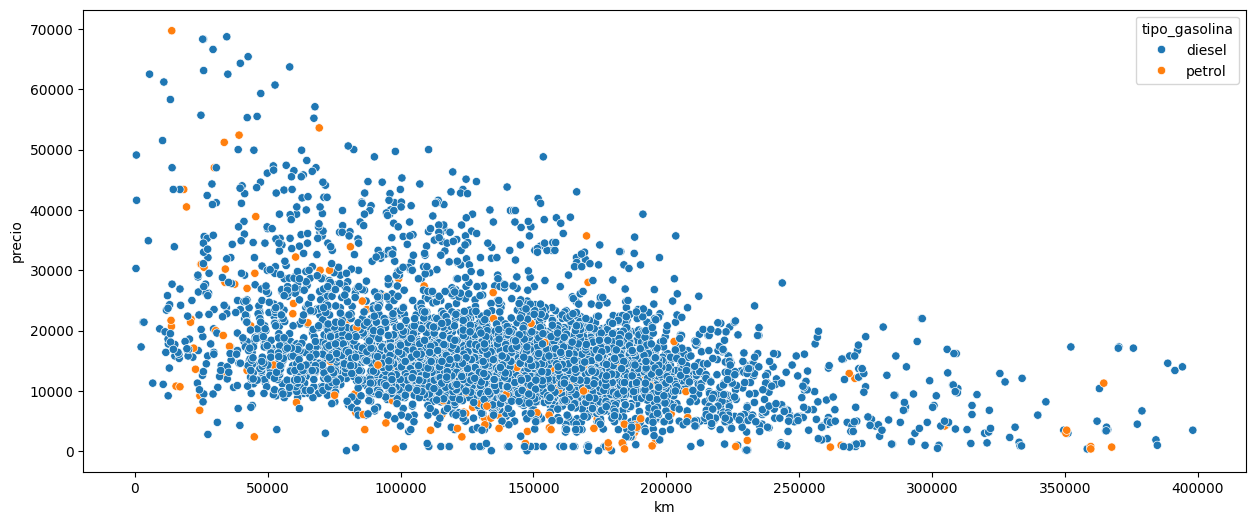

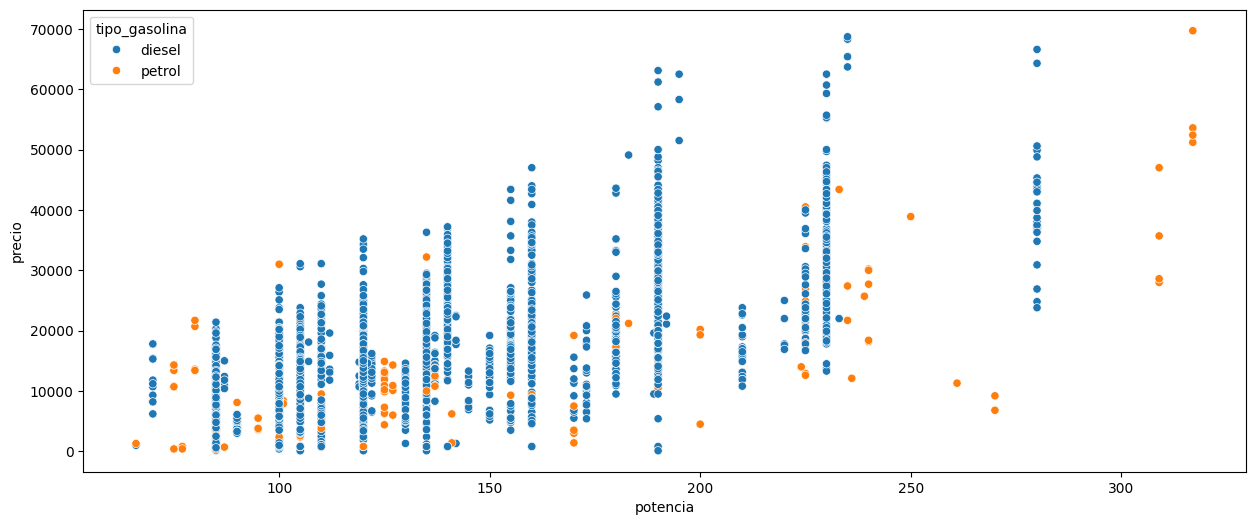

In [909]:
for i in num:
  plt.figure(figsize=(15,6))
  sns.scatterplot(x=i,y="precio", data=bmw_clean, hue='tipo_gasolina')

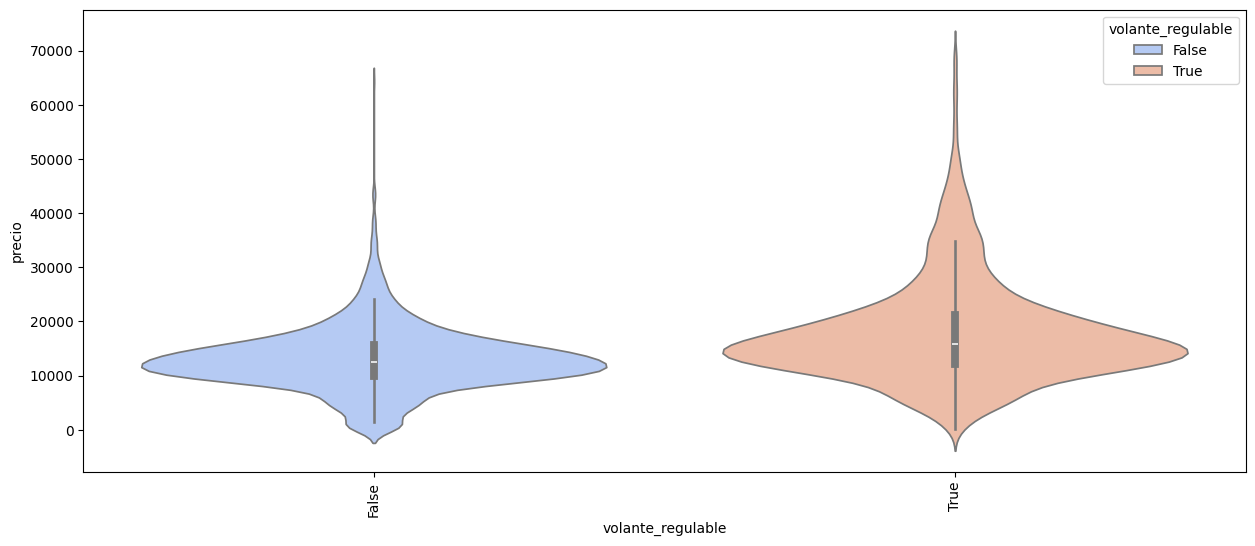

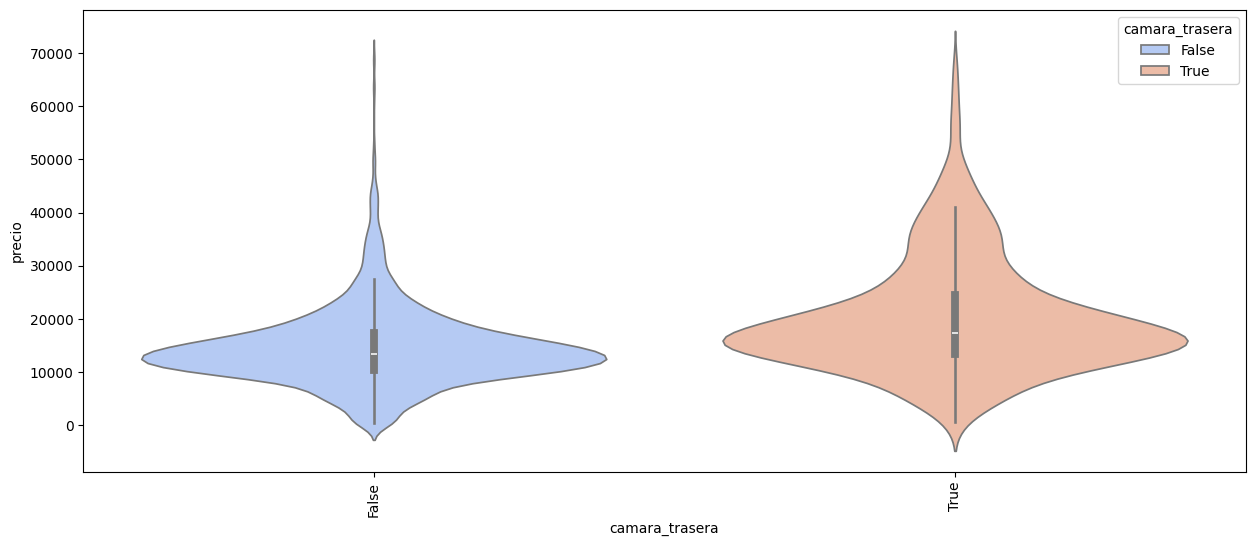

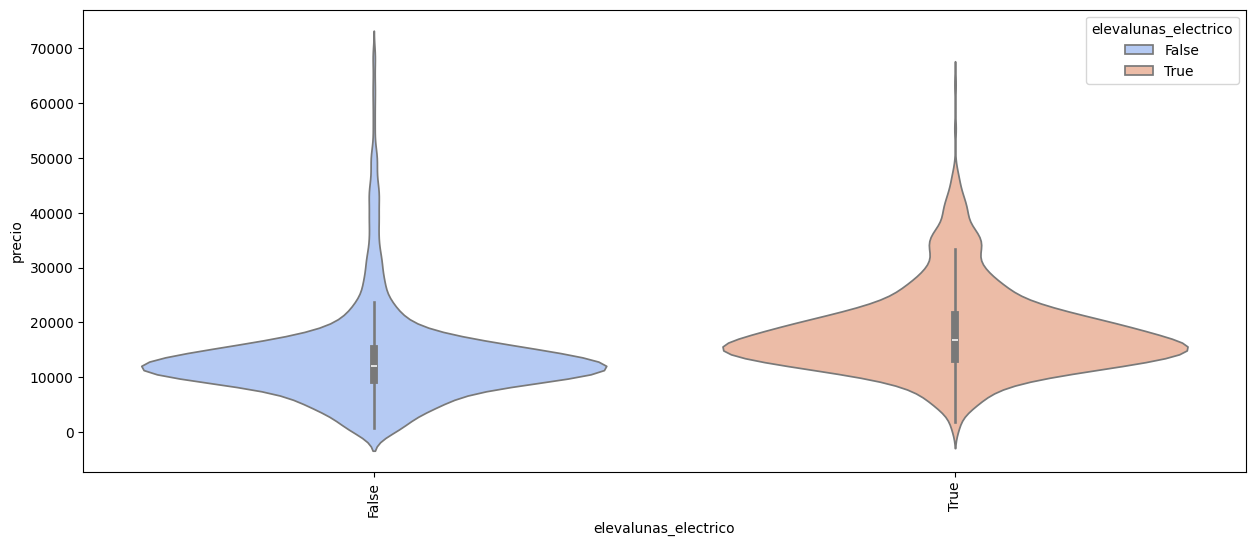

In [910]:
for i in bmw_clean:
  if (bmw_clean[i].dtype.kind =="b"):
    plt.figure(figsize=(15,6))
    sns.violinplot(x=i,y="precio", data=bmw_clean, hue = i, palette = 'coolwarm');
    plt.xticks(rotation=90)

### 7.- Transformación de variables categóricas. OHE (One-Hot Encoding)

In [911]:
bmw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4805 non-null   object 
 1   km                    4805 non-null   int32  
 2   potencia              4805 non-null   int16  
 3   tipo_gasolina         4805 non-null   object 
 4   color                 4805 non-null   object 
 5   tipo_coche            4805 non-null   object 
 6   volante_regulable     4805 non-null   bool   
 7   aire_acondicionado    4805 non-null   object 
 8   camara_trasera        4805 non-null   bool   
 9   elevalunas_electrico  4805 non-null   bool   
 10  bluetooth             4805 non-null   object 
 11  alerta_lim_velocidad  4805 non-null   object 
 12  precio                4805 non-null   float64
dtypes: bool(3), float64(1), int16(1), int32(1), object(7)
memory usage: 342.7+ KB


In [912]:
lcat=['modelo','tipo_gasolina','color','tipo_coche','aire_acondicionado','bluetooth','alerta_lim_velocidad']

In [913]:
bmw_ohe=pd.get_dummies(data=bmw_clean, columns=lcat)

In [914]:
bmw_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   km                             4805 non-null   int32  
 1   potencia                       4805 non-null   int16  
 2   volante_regulable              4805 non-null   bool   
 3   camara_trasera                 4805 non-null   bool   
 4   elevalunas_electrico           4805 non-null   bool   
 5   precio                         4805 non-null   float64
 6   modelo_114                     4805 non-null   bool   
 7   modelo_116                     4805 non-null   bool   
 8   modelo_118                     4805 non-null   bool   
 9   modelo_120                     4805 non-null   bool   
 10  modelo_218                     4805 non-null   bool   
 11  modelo_316                     4805 non-null   bool   
 12  modelo_318                     4805 non-null   b

In [915]:
bmw_ohe.sample(5)

,km,potencia,volante_regulable,camara_trasera,elevalunas_electrico,precio,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_316,modelo_318,modelo_320,modelo_325,modelo_330,modelo_335,modelo_420,modelo_435,modelo_518,modelo_520,modelo_525,modelo_530,modelo_535,modelo_640,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,modelo_otros,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_otros,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin_info,bluetooth_False,bluetooth_True,bluetooth_sin_info,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin_info
1283,204930,122,True,False,True,12500.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3632,43911,105,False,False,True,11900.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
2142,70461,135,True,True,True,25900.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3977,208672,105,False,False,False,11500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False
764,117321,100,True,False,False,8000.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False


### 8.- Transformación de variables numericas - MinMaxScaler

In [916]:
bmw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4805 non-null   object 
 1   km                    4805 non-null   int32  
 2   potencia              4805 non-null   int16  
 3   tipo_gasolina         4805 non-null   object 
 4   color                 4805 non-null   object 
 5   tipo_coche            4805 non-null   object 
 6   volante_regulable     4805 non-null   bool   
 7   aire_acondicionado    4805 non-null   object 
 8   camara_trasera        4805 non-null   bool   
 9   elevalunas_electrico  4805 non-null   bool   
 10  bluetooth             4805 non-null   object 
 11  alerta_lim_velocidad  4805 non-null   object 
 12  precio                4805 non-null   float64
dtypes: bool(3), float64(1), int16(1), int32(1), object(7)
memory usage: 342.7+ KB


In [917]:
lnum=['km','potencia']

In [918]:
bmw_mm=bmw_ohe.copy()

In [919]:
minMaxResultado=MinMaxScaler()

In [920]:
bmw_mm[lnum]=minMaxResultado.fit_transform(bmw_mm[lnum])

In [921]:
bmw_mm.sample(5)

,km,potencia,volante_regulable,camara_trasera,elevalunas_electrico,precio,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_316,modelo_318,modelo_320,modelo_325,modelo_330,modelo_335,modelo_420,modelo_435,modelo_518,modelo_520,modelo_525,modelo_530,modelo_535,modelo_640,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,modelo_otros,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_otros,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin_info,bluetooth_False,bluetooth_True,bluetooth_sin_info,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin_info
1961,0.370333,0.075697,False,False,False,3300.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
2724,0.456376,0.215139,True,False,True,18600.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False
378,0.363302,0.155378,True,False,False,10200.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False
1047,0.511345,0.494024,True,True,True,17400.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False
1108,0.421916,0.075697,False,False,True,11100.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False


### 9.- Análisis de correlación final

In [922]:
bmw_final = bmw_mm.copy()

In [923]:
corr2=bmw_final.corr()

In [946]:
corr2.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,camara_trasera,elevalunas_electrico,precio,modelo_114,modelo_116,modelo_118,modelo_120,modelo_218,modelo_316,modelo_318,modelo_320,modelo_325,modelo_330,modelo_335,modelo_420,modelo_435,modelo_518,modelo_520,modelo_525,modelo_530,modelo_535,modelo_640,modelo_730,modelo_740,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,modelo_otros,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_otros,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin_info,bluetooth_False,bluetooth_True,bluetooth_sin_info,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin_info
km,1.000000,-0.041046,0.071585,0.002043,0.053997,-0.426393,-0.064552,-0.111364,-0.030009,-0.009775,-0.105029,0.005773,0.059129,0.090139,-0.011386,-0.020383,0.011955,-0.126041,-0.061973,0.030894,0.093213,0.096733,0.086759,0.024060,-0.029993,0.014984,-0.015014,0.000362,-0.059652,-0.034193,-0.100232,-0.041630,-0.039069,-0.089272,0.035204,-0.035204,-0.009103,0.036907,-0.024290,-0.020643,0.043635,0.028084,-0.031661,0.001321,-0.021240,0.024873,-0.067142,-0.034453,-0.050219,0.137433,-0.097556,-0.004459,0.064266,-0.030871,-0.088742,-0.073336,-0.027142,0.009474,0.020790,0.020665,-0.033581,0.010313,0.026461,-0.020885,-0.006932
potencia,-0.041046,1.000000,0.326858,0.315509,0.346380,0.677428,-0.083518,-0.322953,-0.115853,0.007703,-0.050707,-0.259741,-0.287027,-0.024777,0.052369,0.130343,0.113912,0.012278,0.120464,-0.079809,-0.014214,0.115632,0.290588,0.261263,0.194567,0.105637,0.163087,0.197252,-0.118955,0.045997,0.064279,0.372417,0.227750,0.162430,-0.107799,0.107799,-0.020094,0.036102,-0.011973,-0.056697,-0.016651,0.007526,0.011795,-0.004026,-0.025504,0.012077,0.003348,0.021754,0.111928,-0.040690,-0.179037,-0.007986,0.024563,-0.136132,0.194391,-0.043482,-0.182512,0.160284,-0.005324,-0.193633,0.205708,0.026710,-0.429556,0.427781,-0.011164
volante_regulable,0.071585,0.326858,1.000000,0.255593,0.278402,0.285325,-0.061795,-0.193848,-0.121073,-0.037735,-0.063278,-0.131304,-0.108886,-0.094531,0.014321,0.025323,0.004642,0.027636,0.032177,0.063745,0.183365,0.094227,0.106841,0.065730,0.066795,0.070242,0.055530,0.028551,-0.098385,0.055991,0.057652,0.154540,0.084618,0.034623,0.012570,-0.012570,-0.025499,0.024835,0.012215,0.039050,0.010151,0.051923,0.008332,-0.025152,-0.035541,-0.015455,-0.102841,0.045228,0.026987,0.003513,-0.117291,-0.022733,0.058031,-0.090957,0.080794,-0.029588,-0.286504,0.259720,-0.020541,-0.108750,0.125820,0.003353,-0.188057,0.186110,-0.003257
camara_trasera,0.002043,0.315509,0.255593,1.000000,0.200433,0.268057,-0.018741,-0.102669,-0.035332,-0.007410,-0.017529,-0.084461,-0.102417,-0.062833,-0.012187,0.022711,0.022703,-0.005260,0.034102,0.003325,0.014942,0.055645,0.093879,0.085460,0.090487,0.096695,0.079805,0.047773,-0.026946,0.018876,-0.000202,0.160119,0.107291,0.004479,-0.010804,0.010804,-0.020389,0.020405,-0.000508,-0.015972,0.011453,0.018424,-0.017725,-0.032265,-0.027946,-0.000089,0.002773,-0.033140,0.031170,-0.036226,-0.031736,0.004301,-0.012556,-0.043289,0.091385,-0.017904,-0.146242,0.106454,0.028759,-0.126487,0.126402,0.026474,-0.167356,0.167089,-0.004941
elevalunas_electrico,0.053997,0.346380,0.278402,0.200433,1.000000,0.289483,-0.021905,-0.172213,-0.095094,0.001814,-0.053297,-0.151404,-0.158326,0.008634,0.032530,0.021179,0.049299,0.100050,0.021819,0.098706,0.129661,0.089549,0.131883,0.070661,0.056864,0.054390,0.018364,0.028924,-0.099978,0.016932,0.039953,0.099004,0.053107,0.016589,-0.005837,0.005837,-0.024294,0.077490,-0.034542,-0.022404,-0.026839,-0.016543,0.014529,-0.010941,-0.022479,-0.030662,0.012990,0.000772,0.086303,0.044767,-0.070643,-0.006660,0.010780,-0.098268,0.022529,-0.065435,-0.257681,0.231181,-0.01

### 10.- PICKLE

In [925]:
import pickle
import os

In [926]:
path=os.getcwd()
path

'c:\\Users\\toniv\\Documents\\Master_NuclioDigital\\Entregas\\BMW_Proj'

In [927]:
pd.to_pickle(bmw_final,path+'/'+'bmw_final.pkl')

### 11.- MODELO sin miedo

In [947]:
bmw_modelo=bmw_final.copy()

In [956]:
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x = bmw_modelo.drop('precio',axis=1) # INDEPENDIENTES VARIABLES
y = bmw_modelo['precio'] # VARIABLES DEPENDIENTE (A PREDECIR)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=30)

lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()
y_pred = lin_reg.predict(X_test)
bmw_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))
print ("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
bmw_resultados["dif"]=bmw_resultados["Predicted"]-bmw_resultados["Actual"]
bmw_resultados.sort_values(by="dif",ascending=True)

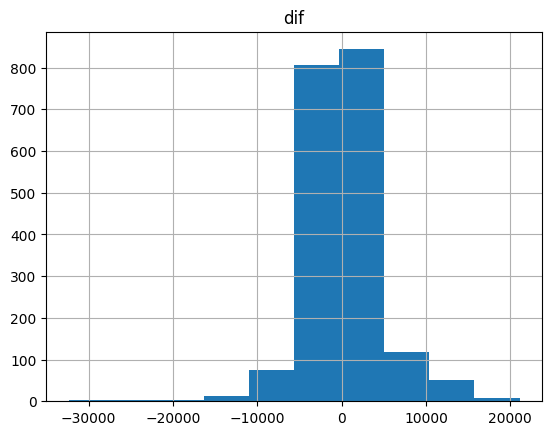

In [969]:
bmw_resultados.hist("dif");

In [975]:
bmw_resultados[abs(bmw_resultados['dif'])<3000].shape

(1307, 3)